# Data Project

> **Note:** 
> 1. This is a starting point for how to structure your data project 
> 1. The `dataproject.py` file includes functions which can be in this notebook

Import and set magics:

In [62]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
from dstapi import DstApi

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject

# predefine options for all plots
plt.rcParams.update({'axes.grid':True,'grid.color':'black','grid.alpha':'0.25','grid.linestyle':'-'})
plt.rcParams.update({'font.size': 14})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Question 1

We load the data from ....

In [63]:
#data = dataproject.load_data()
#JC lugter af ged

In [64]:
# load PRIS113
PRIS113_api = DstApi('PRIS113') 
params = PRIS113_api._define_base_params(language='en')
PRIS113 = PRIS113_api.get_data(params=params)
PRIS113 = PRIS113.sort_values(by = 'TID').reset_index(drop=True)
PRIS113.INDHOLD = PRIS113.INDHOLD.astype('float')
display(PRIS113)


,TYPE,TID,INDHOLD
0,Consumer price index,1980M01,33.0
1,Consumer price index,1980M02,33.3
2,Consumer price index,1980M03,33.8
3,Consumer price index,1980M04,34.0
4,Consumer price index,1980M05,34.5
...,...,...,...
544,Consumer price index,2025M05,120.4
545,Consumer price index,2025M06,120.7
546,Consumer price index,2025M07,122.5
547,Consumer price index,2025M08,121.7


In [65]:
# calc average CPI in 2020
mask = PRIS113['TID'].str.startswith('2020') # mask for 2020
CPI_2020_mean = PRIS113.loc[mask,'INDHOLD'].mean()

# reindex CPI so index = 100 is 2020 CPI mean
PRIS113['CPI_2020indexed'] = (PRIS113.iloc[:,2] / CPI_2020_mean) * 100

# calc month to month inflation
PRIS113['Pi_monthly'] = PRIS113['INDHOLD'] / PRIS113.iloc[:,2].shift(1) - 1

# calc year to year inflation
PRIS113['Pi_yearly'] = PRIS113['INDHOLD'] / PRIS113['INDHOLD'].shift(12) - 1

# print head
PRIS113.head()

,TYPE,TID,INDHOLD,CPI_2020indexed,Pi_monthly,Pi_yearly
0,Consumer price index,1980M01,33.0,31.904608,NaN,NaN
1,Consumer price index,1980M02,33.3,32.194650,0.009091,NaN
2,Consumer price index,1980M03,33.8,32.678053,0.015015,NaN
3,Consumer price index,1980M04,34.0,32.871415,0.005917,NaN
4,Consumer price index,1980M05,34.5,33.354818,0.014706,NaN


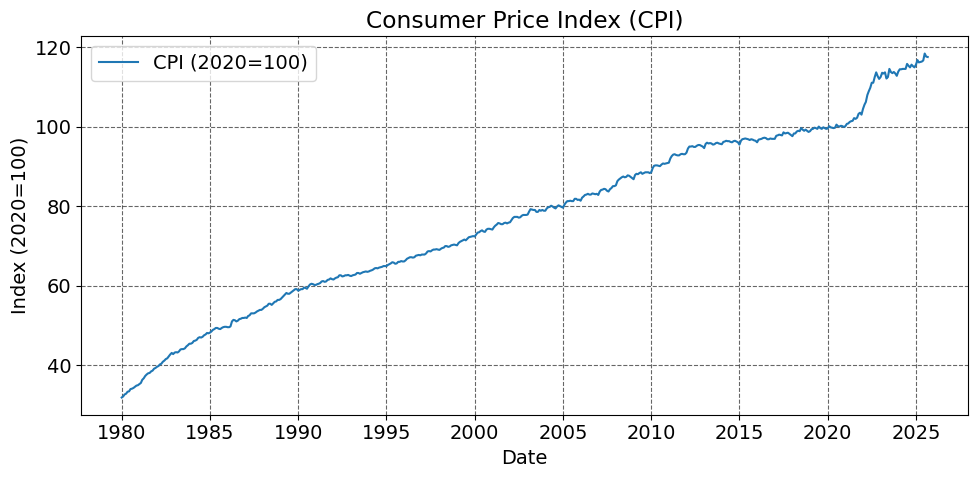

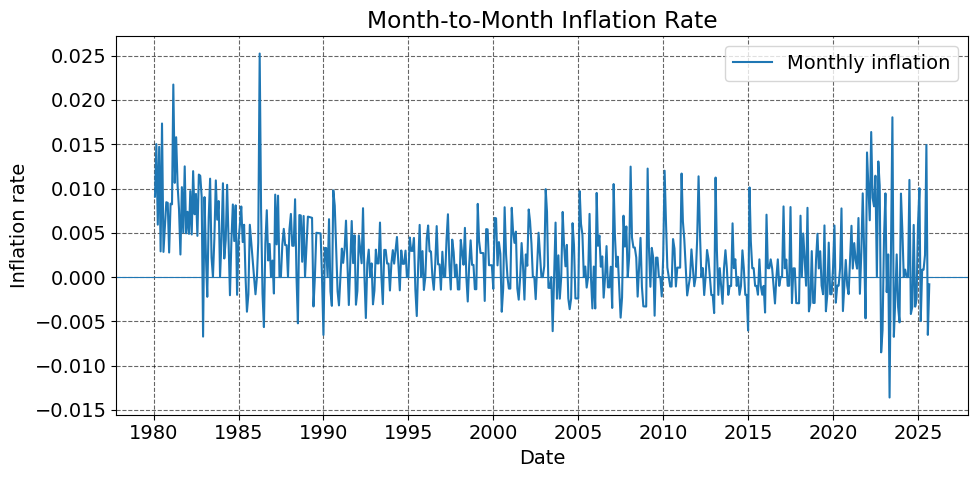

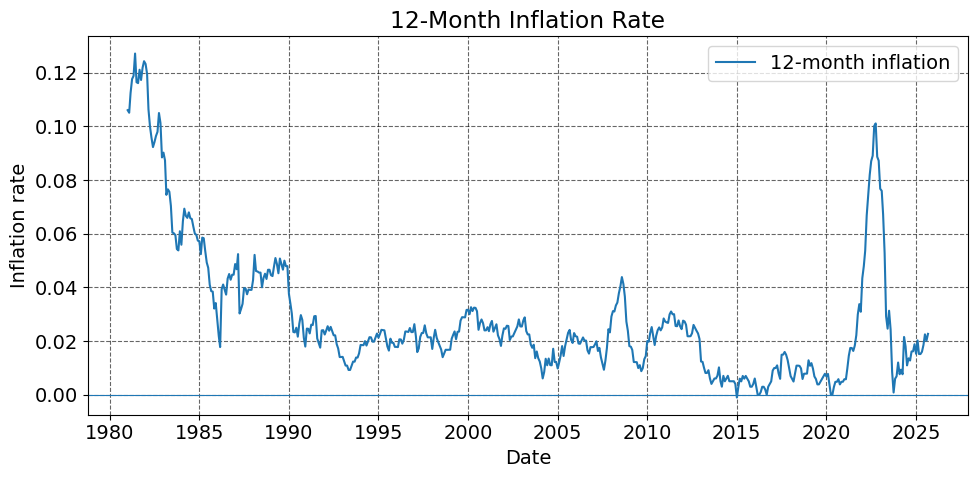

In [66]:
# Create date column
PRIS113['date'] = pd.to_datetime(PRIS113['TID'], format='%YM%m')

# Use the datetime index for clean time-series plots
PRIS113 = PRIS113.set_index('date').sort_index()

# 1) CPI (2020=100)
plt.figure(figsize=(10, 5))
plt.plot(PRIS113.index, PRIS113['CPI_2020indexed'], label='CPI (2020=100)')
plt.title('Consumer Price Index (CPI)')
plt.xlabel('Date'); plt.ylabel('Index (2020=100)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(); plt.tight_layout(); plt.show()

# 2) Month-to-month inflation rate
plt.figure(figsize=(10, 5))
plt.plot(PRIS113.index, PRIS113['Pi_monthly'], label='Monthly inflation')
plt.title('Month-to-Month Inflation Rate')
plt.xlabel('Date'); plt.ylabel('Inflation rate')
plt.axhline(0, linewidth=0.8)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(); plt.tight_layout(); plt.show()

# 3) 12-month inflation rate
plt.figure(figsize=(10, 5))
plt.plot(PRIS113.index, PRIS113['Pi_yearly'], label='12-month inflation')
plt.title('12-Month Inflation Rate')
plt.xlabel('Date'); plt.ylabel('Inflation rate')
plt.axhline(0, linewidth=0.8)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(); plt.tight_layout(); plt.show()


Finding the stopping point of the post pandemic inflation surge

In [ ]:
# trimming dataset to look at post 2020
post2020 = PRIS113.loc[PRIS113.index >= '2021-01-01'].copy()

# find index and value of peak inflation using idxmax method
peak_idx = post2020['Pi_yearly'].idxmax()
peak_val = post2020.loc[peak_idx, 'Pi_yearly']

# "normal" inflation threshhold
threshold = 0.02

# 4. Among dates *after* the peak, find first date with Pi_yearly < threshold
after_peak = post2020.loc[post2020.index > peak_idx]
# Filter
candidates = after_peak[after_peak['Pi_yearly'] < threshold]

if not candidates.empty:
    end_idx = candidates.index[0]
    end_val = candidates.loc[end_idx, 'Pi_yearly']
    print(f"Peak (post-2020) inflation: {peak_val:.2%} in {peak_idx:%Y-%m}")
    print(f"Surge ended (below {threshold:.2%}): {end_val:.2%} in {end_idx:%Y-%m}")
else:
    print("Inflation did not fall below threshold after the post-2020 peak in your data.")


Peak (post-2020) inflation: 10.11% in 2022-10
Surge ended (below 2.00%): 0.86% in 2023-09


In [70]:
print(peak_idx)

2022-10-01 00:00:00


## Question 2

We process the data by ...

In [3]:
data = dataproject.process_data(data)

In [ ]:
flotte jeppe er en meget høflig mand

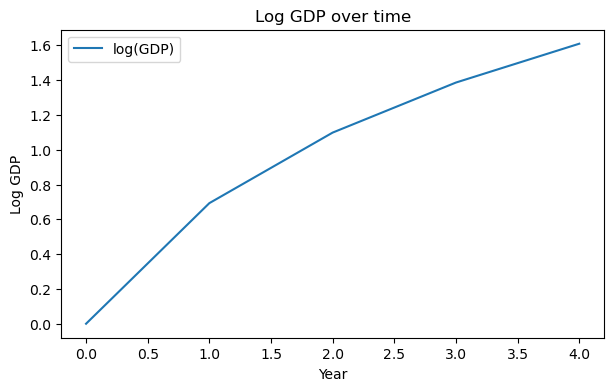

In [4]:
fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot(111)

ax.plot(data['log_GDP'],label='log(GDP)')

ax.set_title('Log GDP over time')
ax.set_xlabel('Year')
ax.set_ylabel('Log GDP')

ax.legend();

We find that that ...